Библиотеки для работы с данными и математики

In [199]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sn

Получение данных

In [200]:
df = pd.read_csv('C:\\Users\\mvideo\\PycharmProjects\\AI_labs\\resources\\diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Pedigree  Age  Outcome  
0       0.627   50        1  
1       0.351   31        0  
2       0.672   32        1  
3       0.167   21        0  
4       2.288   33        1  
..        ...  ...      ...  
763     0.171   63        0  
764     0.340   27        0  
765     0.245   30        0  
766     0.349   47        1  
767     0.315   23        0  

[768 rows x 9 columns]

Нечисловых категориальных признаков не обнаружено

Приступим к анализу данных

In [201]:
for col_name, params in df.items():
    count = len(params)
    mean = sum(params) / count
    min_value = min(params)
    max_value = max(params)
    
    # Рассчитаем стандартное отклонение σ = √(Σ(xi - x̄)^2 / (n - 1))
    denominator = count - 1
    numerator = 0
    for value in params:
        numerator += (value - mean)**2
    standard_deviation = (numerator / denominator)**(1/2)
    
    # Расчёт квантилей
    
    # Квантиль - это число, которое разделяет упорядоченную выборку на две части, так,
    # что определенная доля значений находится в каждой из них.
    sorted_params = sorted(params)
    q25 = None
    q50 = None
    q75 = None
    tmp_count = 0
    for val in sorted_params:
        tmp_count += 1
        if q25 is None and tmp_count / count > 0.25:
            q25 = val
        if q50 is None and tmp_count / count > 0.50:
            q50 = val
        if q75 is None and tmp_count / count > 0.75:
            q75 = val
            break
            
    # Вывод данных для колонки
    print("Название столбца: ", col_name)
    print("Среднее значение: ", mean)
    print("Максимальное значение: ", max_value)
    print("Минимальное значение: ", min_value)
    print("Стандартное отклонение: ", standard_deviation)
    print("Квантиль 0.25: ", q25)
    print("Квантиль 0.50: ", q50)
    print("Квантиль 0.75: ", q75)
    print("")

Название столбца:  Pregnancies
Среднее значение:  3.8450520833333335
Максимальное значение:  17
Минимальное значение:  0
Стандартное отклонение:  3.3695780626988623
Квантиль 0.25:  1
Квантиль 0.50:  3
Квантиль 0.75:  6

Название столбца:  Glucose
Среднее значение:  120.89453125
Максимальное значение:  199
Минимальное значение:  0
Стандартное отклонение:  31.97261819513622
Квантиль 0.25:  99
Квантиль 0.50:  117
Квантиль 0.75:  141

Название столбца:  BloodPressure
Среднее значение:  69.10546875
Максимальное значение:  122
Минимальное значение:  0
Стандартное отклонение:  19.355807170644777
Квантиль 0.25:  62
Квантиль 0.50:  72
Квантиль 0.75:  80

Название столбца:  SkinThickness
Среднее значение:  20.536458333333332
Максимальное значение:  99
Минимальное значение:  0
Стандартное отклонение:  15.952217567727677
Квантиль 0.25:  0
Квантиль 0.50:  23
Квантиль 0.75:  32

Название столбца:  Insulin
Среднее значение:  79.79947916666667
Максимальное значение:  846
Минимальное значение:  0
Станд

Проверим на наличие null значений

In [202]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

Pregnancies
Pregnancies
False    768
Name: count, dtype: int64
 
Glucose
Glucose
False    768
Name: count, dtype: int64
 
BloodPressure
BloodPressure
False    768
Name: count, dtype: int64
 
SkinThickness
SkinThickness
False    768
Name: count, dtype: int64
 
Insulin
Insulin
False    768
Name: count, dtype: int64
 
BMI
BMI
False    768
Name: count, dtype: int64
 
Pedigree
Pedigree
False    768
Name: count, dtype: int64
 
Age
Age
False    768
Name: count, dtype: int64
 
Outcome
Outcome
False    768
Name: count, dtype: int64
 


Разделим данные на независимые признаки и зависимые переменные

In [203]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

Визуализация распределения данных до нормировки

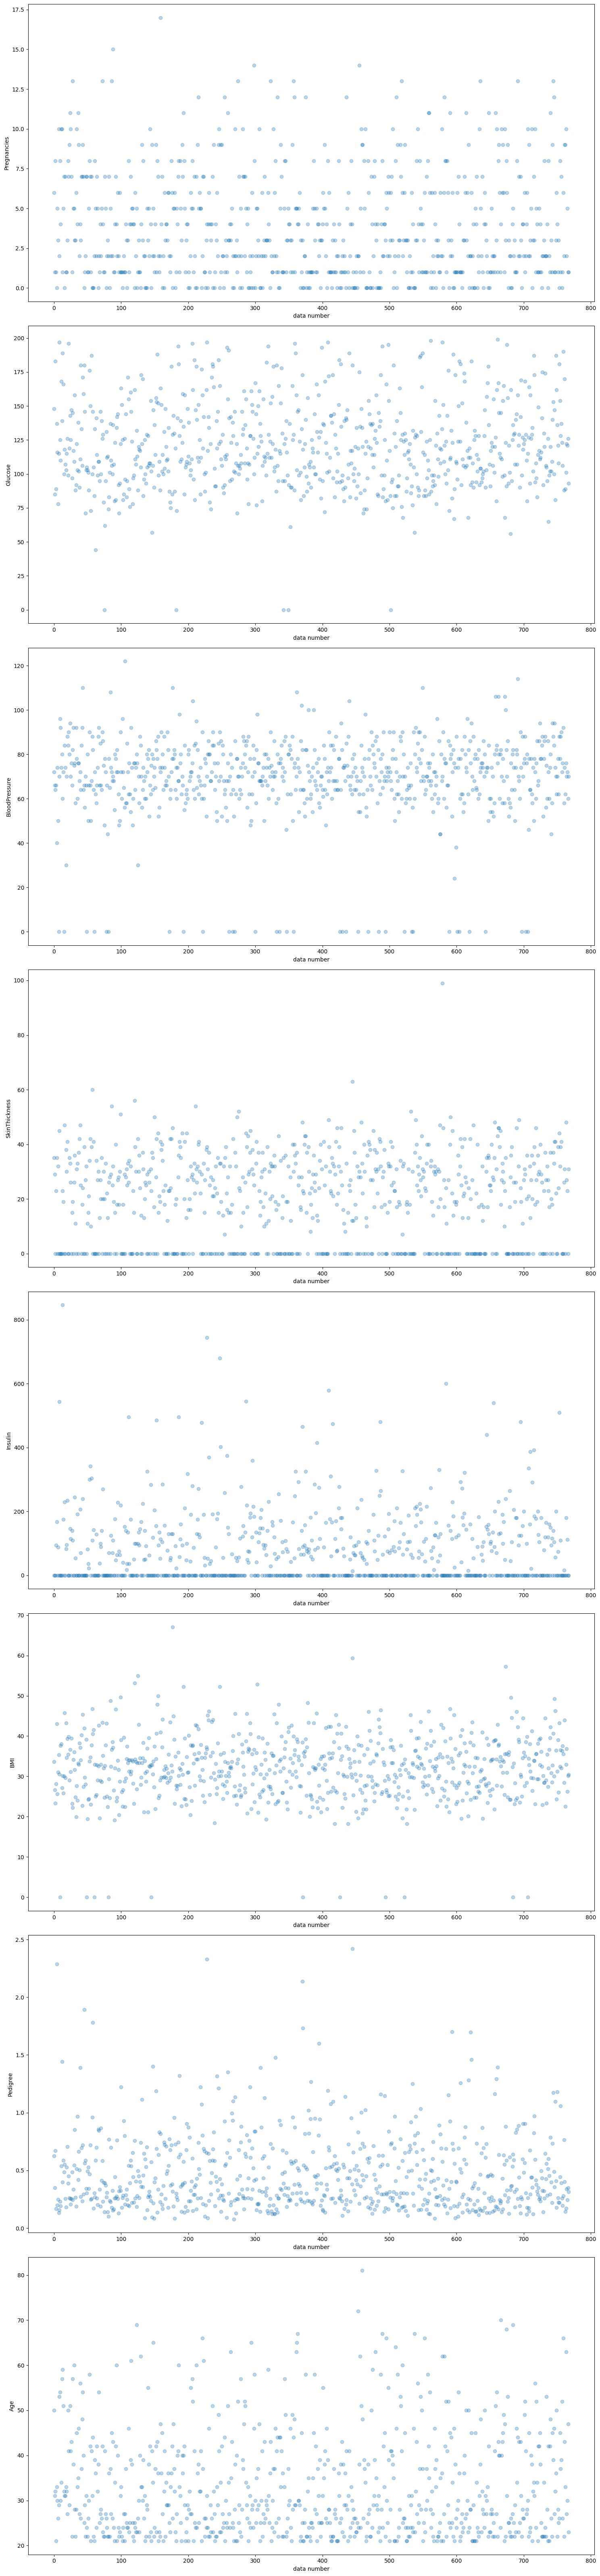

In [204]:
columns = X.columns

fig, axes = plt.subplots(len(columns), 1, figsize=(15, len(columns)*8))

for i, column in enumerate(columns):
    axes[i].scatter(range(len(X)), X[column], alpha=0.3)
    axes[i].set_xlabel('data number')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

Исходя из графиков распределения обнаружены невалидные данные:
Glucose != 0
BloodPressure != 0
SkinThickness != 0
Insulin != 0
BMI != 0

Заменим нулевые значения в этих столбцах средними значениями ненулевых по столбцам.

In [205]:
nullable_cols = {"Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"}

for col_name in nullable_cols:
    not_null_mean = X[X[col_name] != 0][col_name].mean()
    X[col_name] = X[col_name].astype(float)
    X.loc[X[col_name] == 0, col_name] = not_null_mean


Визуализируем распределение данных после заполнения пустых значений

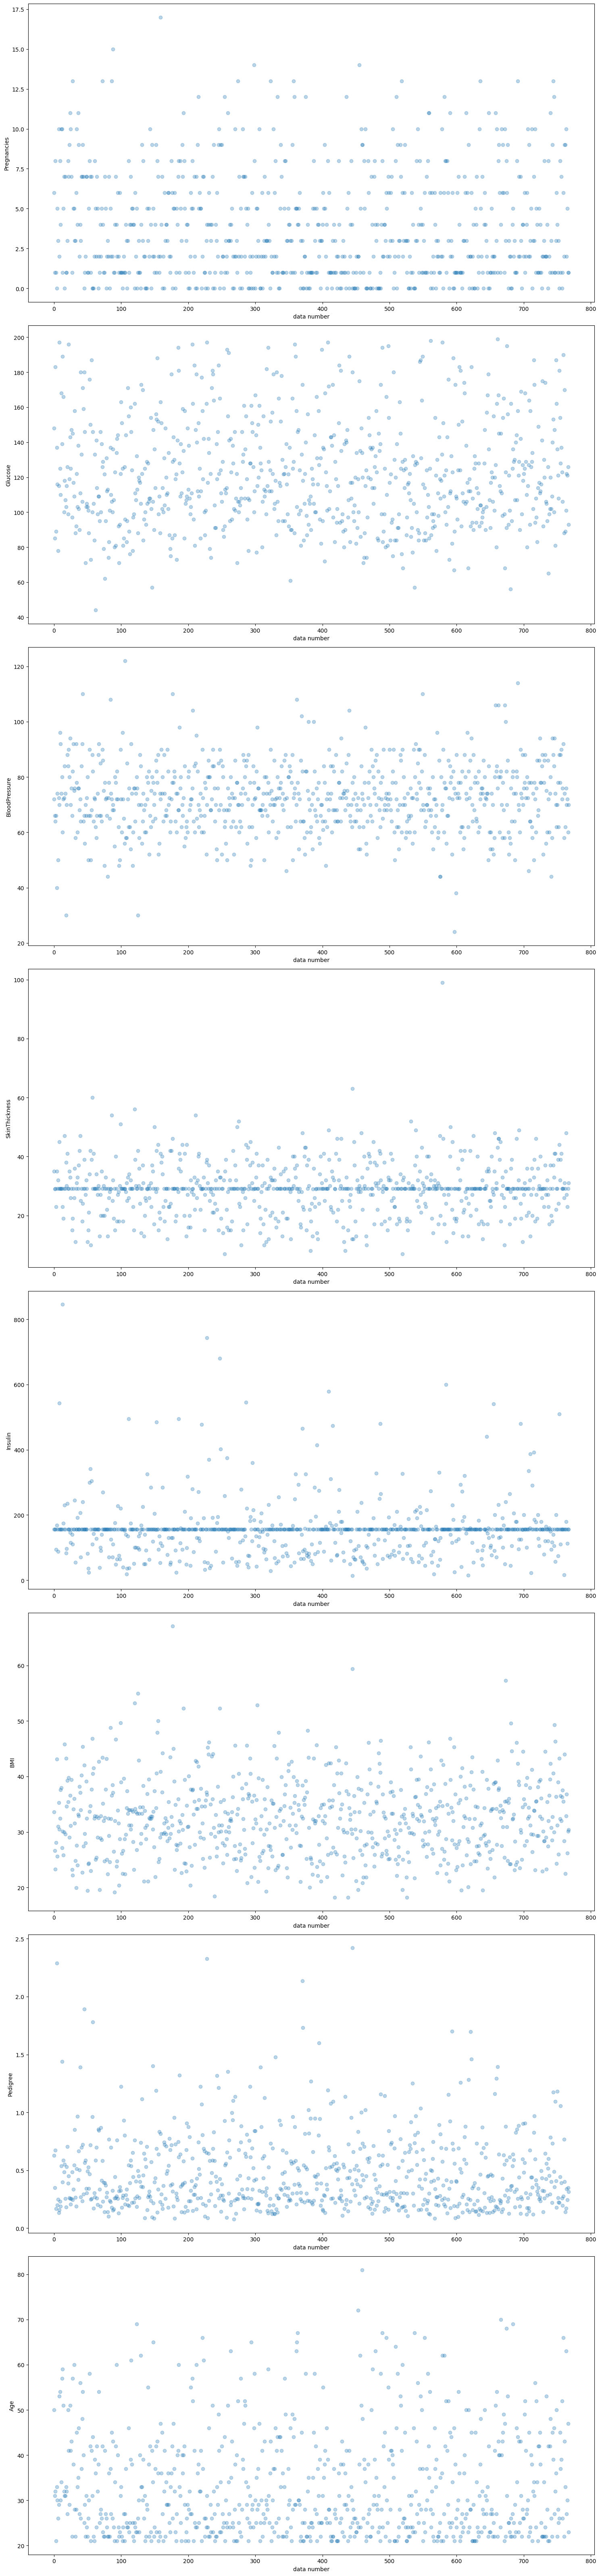

In [206]:
columns = X.columns

fig, axes = plt.subplots(len(columns), 1, figsize=(15, len(columns)*8))

for i, column in enumerate(columns):
    axes[i].scatter(range(len(X)), X[column], alpha=0.3)
    axes[i].set_xlabel('data number')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

In [207]:
X.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Pregnancies       1.000000  0.127911       0.208522       0.082989  0.056027   
Glucose           0.127911  1.000000       0.218367       0.192991  0.420157   
BloodPressure     0.208522  0.218367       1.000000       0.192816  0.072517   
SkinThickness     0.082989  0.192991       0.192816       1.000000  0.158139   
Insulin           0.056027  0.420157       0.072517       0.158139  1.000000   
BMI               0.021565  0.230941       0.281268       0.542398  0.166586   
Pedigree         -0.033523  0.137060      -0.002763       0.100966  0.098634   
Age               0.544341  0.266534       0.324595       0.127872  0.136734   

                    BMI  Pedigree       Age  
Pregnancies    0.021565 -0.033523  0.544341  
Glucose        0.230941  0.137060  0.266534  
BloodPressure  0.281268 -0.002763  0.324595  
SkinThickness  0.542398  0.100966  0.127872  
Insulin        0.166586  0.098634  0.136734  
BMI            1.000000  0.153400  0.025519  
Pedigree       0.153400  1.000000  0.033561  
Age            0.025519  0.033561  1.000000

Проведем нормализацию данных при помощи min-max 
где X = (x - x_min) / (x_max - x_min)

In [208]:
for column_name, params in X.items():
  minimum = min(params)
  maximum = max(params)
  difference = maximum - minimum
  X[column_name] = (X[column_name] - minimum) / difference

Визуализируем распределение данных после нормировки

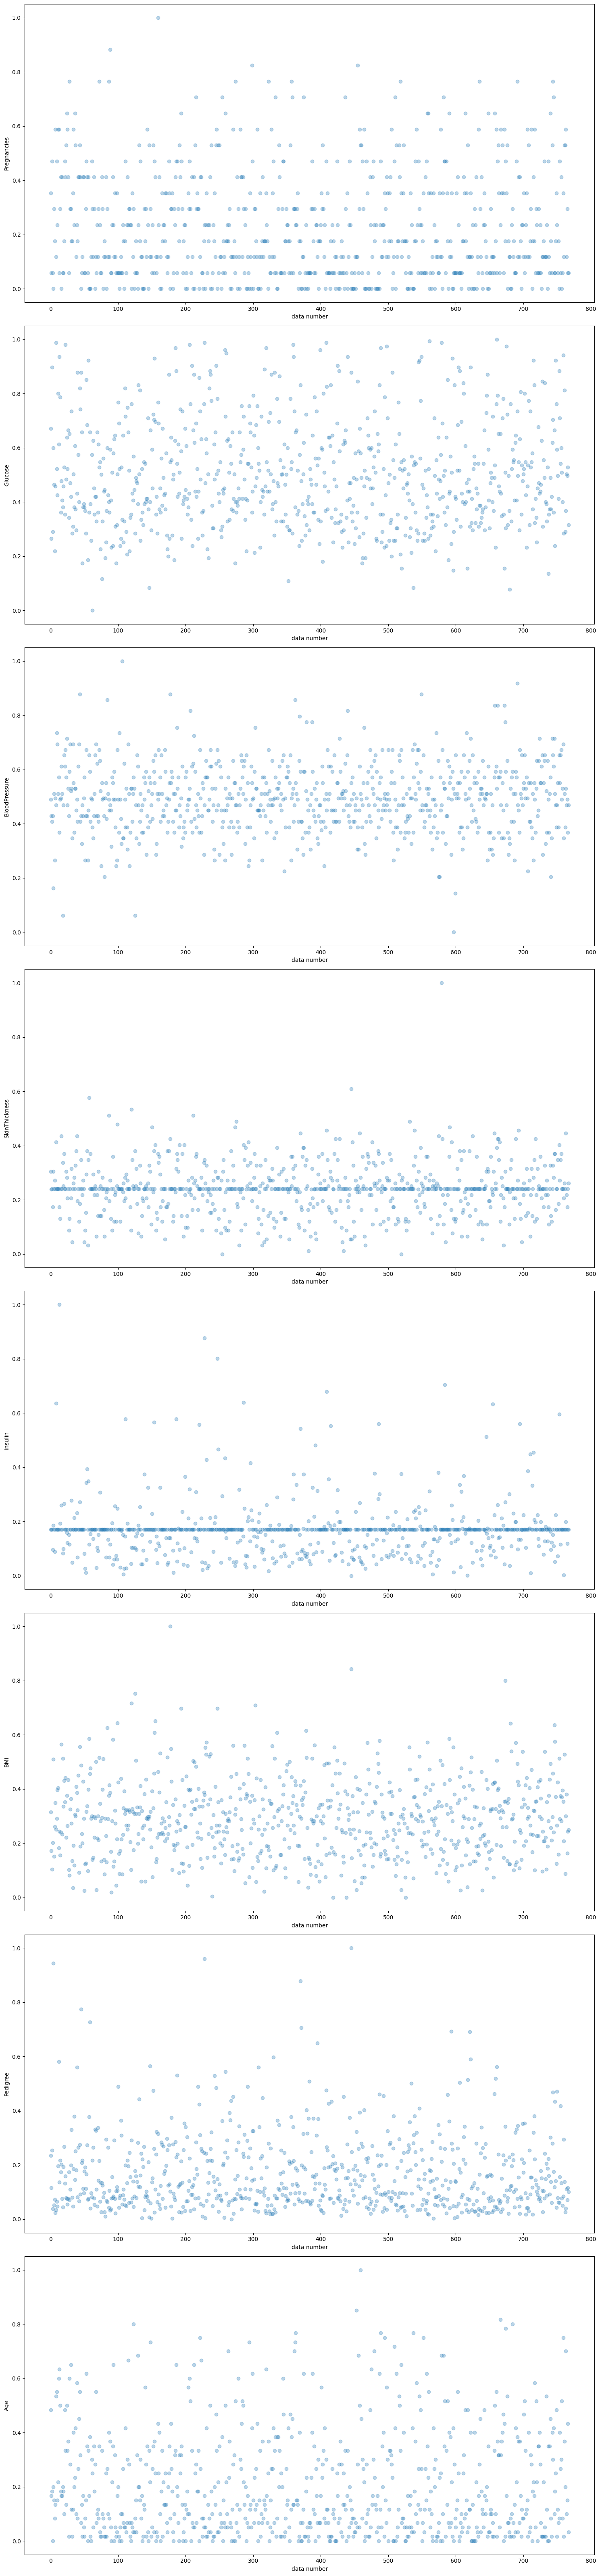

In [209]:
columns = X.columns

fig, axes = plt.subplots(len(columns), 1, figsize=(15, len(columns)*8))

for i, column in enumerate(columns):
    axes[i].scatter(range(len(X)), X[column], alpha=0.3)
    axes[i].set_xlabel('data number')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

Теперь разделим на тренировочную и тестовую выборки в соотношении 2 : 8

In [210]:
indexes = list(range(len(X)))
test_size = 0.2
random.seed(42)
random.shuffle(indexes)
split_index = int(len(X) * test_size)

X_train = X.iloc[indexes[split_index:]]
X_test = X.iloc[indexes[:split_index]]
Y_train = Y.iloc[indexes[split_index:]]
Y_test = Y.iloc[indexes[:split_index]]

In [211]:
X_train

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
489     0.470588  0.967742       0.571429       0.240798  0.170130  0.161554   
451     0.117647  0.580645       0.469388       0.240798  0.170130  0.218814   
637     0.117647  0.322581       0.530612       0.119565  0.062500  0.274029   
399     0.176471  0.961290       0.469388       0.260870  0.170130  0.341513   
452     0.000000  0.303226       0.448980       0.271739  0.235577  0.443763   
..           ...       ...            ...            ...       ...       ...   
281     0.588235  0.548387       0.530612       0.228261  0.129808  0.361963   
759     0.352941  0.941935       0.693878       0.240798  0.170130  0.353783   
25      0.588235  0.522581       0.469388       0.206522  0.121394  0.263804   
114     0.411765  0.748387       0.306122       0.271739  0.193510  0.251534   
654     0.058824  0.400000       0.469388       0.228261  0.145433  0.327198   

     Pedigree       Age  
489  0.201964  0.766667  
451  0.198121  0.033333  
637  0.243809  0.033333  
399  0.069599  0.066667  
452  0.129377  0.066667  
..        ...       ...  
281  0.086251  0.300000  
759  0.085397  0.750000  
25   0.054227  0.333333  
114  0.217763  0.300000  
654  0.027327  0.016667  

[615 rows x 8 columns]

In [212]:
X_test

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
490     0.117647  0.251613       0.418367       0.228261  0.062500  0.380368   
593     0.117647  0.245161       0.285714       0.163043  0.121394  0.210634   
719     0.294118  0.341935       0.530612       0.217391  0.170130  0.355828   
174     0.117647  0.200000       0.408163       0.184783  0.049279  0.235174   
595     0.000000  0.929032       0.591837       0.076087  0.205529  0.282209   
..           ...       ...            ...            ...       ...       ...   
138     0.000000  0.548387       0.571429       0.240798  0.170130  0.265849   
358     0.705882  0.283871       0.510204       0.358696  0.048077  0.349693   
378     0.235294  0.722581       0.520408       0.240798  0.170130  0.615542   
555     0.411765  0.516129       0.469388       0.282609  0.241587  0.149284   
547     0.235294  0.561290       0.448980       0.152174  0.182692  0.304703   

     Pedigree       Age  
490  0.235269  0.050000  
593  0.692143  0.066667  
719  0.128096  0.516667  
174  0.124680  0.200000  
595  0.257899  0.016667  
..        ...       ...  
138  0.266866  0.133333  
358  0.128096  0.450000  
378  0.068318  0.183333  
555  0.035440  0.266667  
547  0.035013  0.116667  

[153 rows x 8 columns]

In [213]:
Y_train

489    0
451    1
637    0
399    1
452    0
      ..
281    0
759    1
25     1
114    1
654    0
Name: Outcome, Length: 615, dtype: int64

In [214]:
Y_test

490    0
593    0
719    1
174    0
595    1
      ..
138    0
358    0
378    1
555    0
547    0
Name: Outcome, Length: 153, dtype: int64

Метод K ближайших соседей

Объявим необходимые функции

In [215]:
X_train.values

array([[0.47058824, 0.96774194, 0.57142857, ..., 0.16155419, 0.20196413,
        0.76666667],
       [0.11764706, 0.58064516, 0.46938776, ..., 0.21881391, 0.19812126,
        0.03333333],
       [0.11764706, 0.32258065, 0.53061224, ..., 0.27402863, 0.24380871,
        0.03333333],
       ...,
       [0.58823529, 0.52258065, 0.46938776, ..., 0.26380368, 0.05422716,
        0.33333333],
       [0.41176471, 0.7483871 , 0.30612245, ..., 0.25153374, 0.2177626 ,
        0.3       ],
       [0.05882353, 0.4       , 0.46938776, ..., 0.32719836, 0.02732707,
        0.01666667]])

In [216]:
# Расчёт Евклидова расстояния между объектами
def euclidean_distance(x, y):
    distance = 0    
    for g in range (len(x)):
        diff = x[g] - y[g]
        squared_diff = diff ** 2
        distance += squared_diff
    return np.sqrt(distance)


# Получение массива k ближайших событий
def get_neighbors(x_train, y_train, x_test_values, k):
    x_train_values = x_train.values
    y_train_values = y_train.values
    distances = []
    for n in range (len(x_train_values)):
        distances.append((y_train_values[n], euclidean_distance(x_train_values[n], x_test_values)))
    distances.sort(key=lambda elem: elem[1])
    neighbors = []
    for p in range(k):
        neighbors.append(distances[p][0])

    return neighbors

# Предсказание класса по массиву k ближайших событий
def predict_class(neighbors):
  counter = {}

  for neighbor in neighbors:
    if neighbor in counter:
        counter[neighbor] += 1
    else:
        counter[neighbor] = 1

  max_count = max(counter.values())
  return [key for key, v in counter.items() if v == max_count][0]


# Предсказание классов для всех объектов тестовой выборки
def predict_all(x_train, y_train, x_test, k):
  predicted_cl = []

  for h in range(len(X_test.values)):
    predicted_cl.append(predict_class(get_neighbors(x_train, y_train, x_test.values[h], k)))

  return predicted_cl


Проверка работоспособности метода

In [217]:
predicted_classes = predict_all(X_train, Y_train, X_test, 5)
matches_count = 0
for j in range(len(Y_test)):
    if predicted_classes[j] == Y_test.values[j]:
        matches_count += 1
predicted_percent = 100 * matches_count / len(Y_test)
print("Результат с текущими признаками: ", predicted_percent)

for i, column in enumerate(columns):
    predicted_classes = predict_all(X_train.drop(column, axis=1), Y_train, X_test.drop(column, axis=1), 5)
    matches_count = 0
    for j in range(len(Y_test)):
        if predicted_classes[j] == Y_test.values[j]:
            matches_count += 1
    predicted_percent = 100 * matches_count / len(Y_test)
    print("Убрали колонку ", column, " Процент предсказания:", predicted_percent)

Результат с текущими признаками:  75.16339869281046
Убрали колонку  Pregnancies  Процент предсказания: 74.50980392156863
Убрали колонку  Glucose  Процент предсказания: 66.01307189542484
Убрали колонку  BloodPressure  Процент предсказания: 77.77777777777777
Убрали колонку  SkinThickness  Процент предсказания: 71.89542483660131
Убрали колонку  Insulin  Процент предсказания: 70.58823529411765
Убрали колонку  BMI  Процент предсказания: 75.16339869281046
Убрали колонку  Pedigree  Процент предсказания: 73.85620915032679
Убрали колонку  Age  Процент предсказания: 71.89542483660131


Модель со случайным набором признаков

In [218]:
columns_to_drop = np.random.choice(X.columns.values, size=np.random.randint(1, len(X.columns)) , replace=False)
random_X_train = X_train.drop(columns_to_drop, axis=1)
random_X_test = X_test.drop(columns_to_drop, axis=1)
random_model = [random_X_train, random_X_test, Y_train, Y_test]

random_model[0]

Pregnancies   Glucose  BloodPressure   Insulin       Age
489     0.470588  0.967742       0.571429  0.170130  0.766667
451     0.117647  0.580645       0.469388  0.170130  0.033333
637     0.117647  0.322581       0.530612  0.062500  0.033333
399     0.176471  0.961290       0.469388  0.170130  0.066667
452     0.000000  0.303226       0.448980  0.235577  0.066667
..           ...       ...            ...       ...       ...
281     0.588235  0.548387       0.530612  0.129808  0.300000
759     0.352941  0.941935       0.693878  0.170130  0.750000
25      0.588235  0.522581       0.469388  0.121394  0.333333
114     0.411765  0.748387       0.306122  0.193510  0.300000
654     0.058824  0.400000       0.469388  0.145433  0.016667

[615 rows x 5 columns]

In [219]:
random_model[1]

Pregnancies   Glucose  BloodPressure   Insulin       Age
490     0.117647  0.251613       0.418367  0.062500  0.050000
593     0.117647  0.245161       0.285714  0.121394  0.066667
719     0.294118  0.341935       0.530612  0.170130  0.516667
174     0.117647  0.200000       0.408163  0.049279  0.200000
595     0.000000  0.929032       0.591837  0.205529  0.016667
..           ...       ...            ...       ...       ...
138     0.000000  0.548387       0.571429  0.170130  0.133333
358     0.705882  0.283871       0.510204  0.048077  0.450000
378     0.235294  0.722581       0.520408  0.170130  0.183333
555     0.411765  0.516129       0.469388  0.241587  0.266667
547     0.235294  0.561290       0.448980  0.182692  0.116667

[153 rows x 5 columns]

Модель с фиксированным набором признаков

C:\Users\mvideo\PycharmProjects\AI_labs\venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


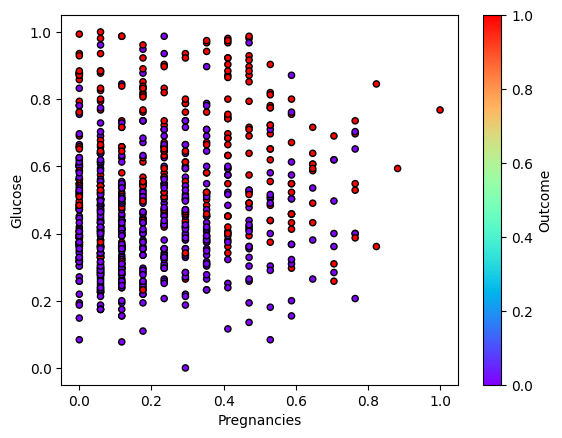

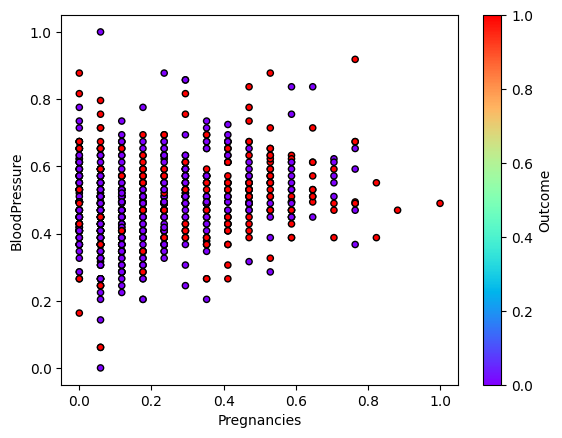

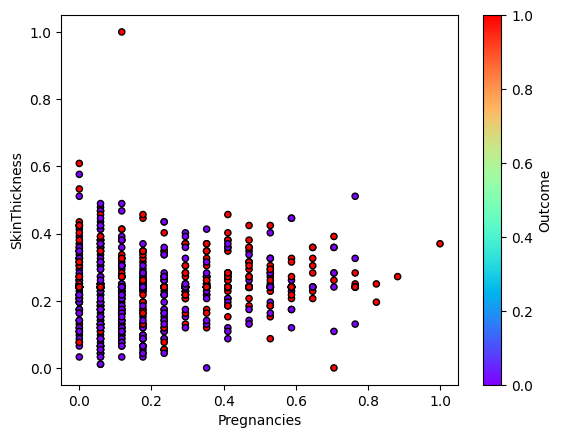

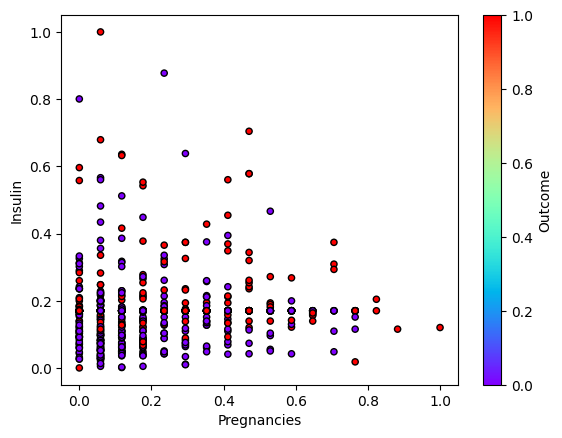

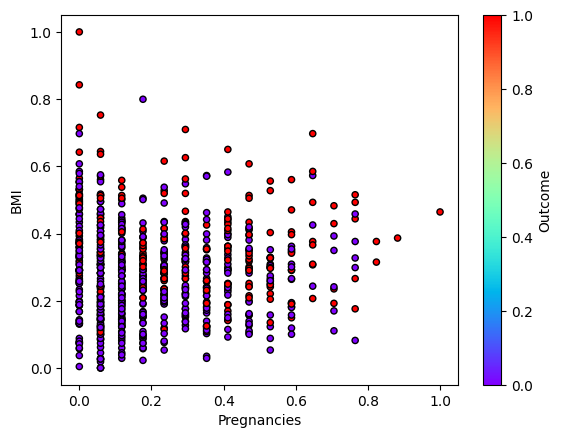

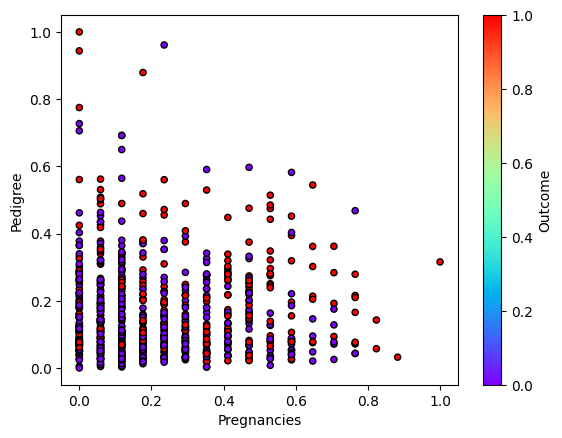

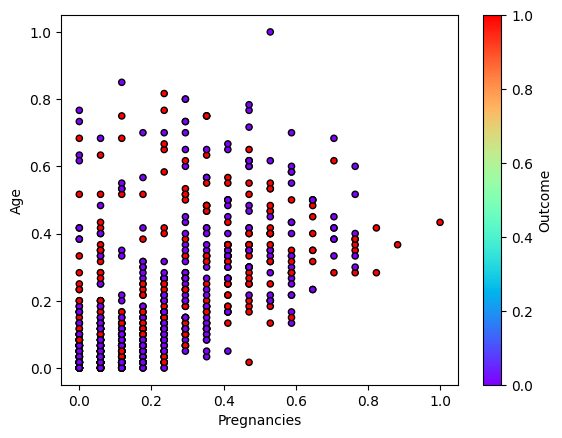

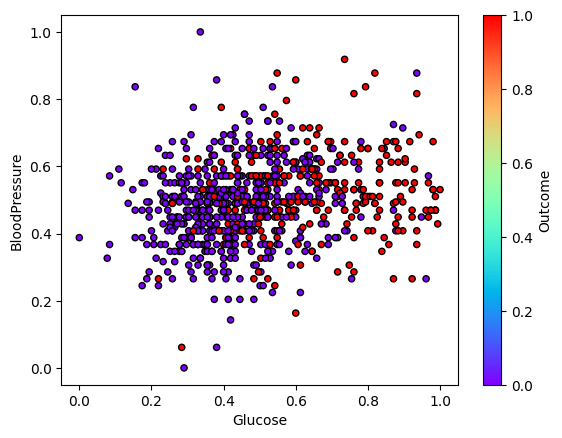

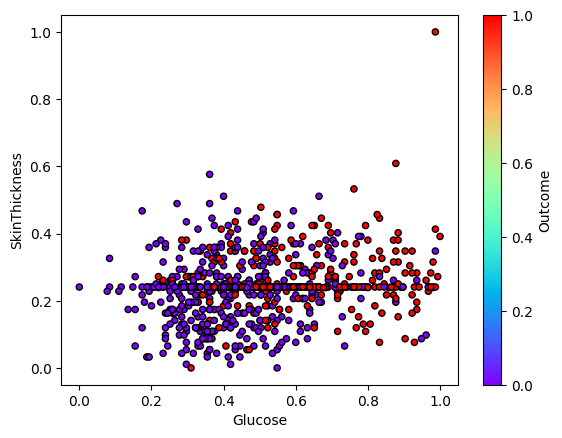

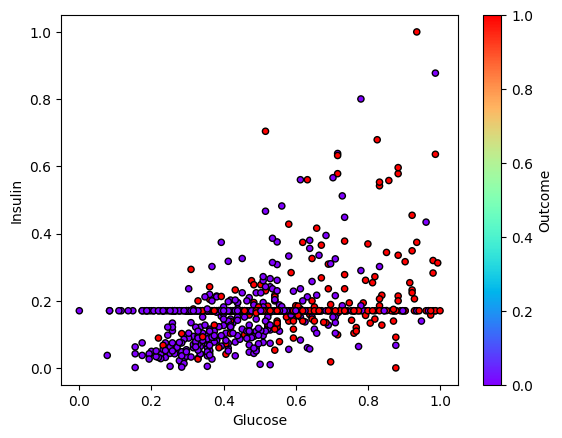

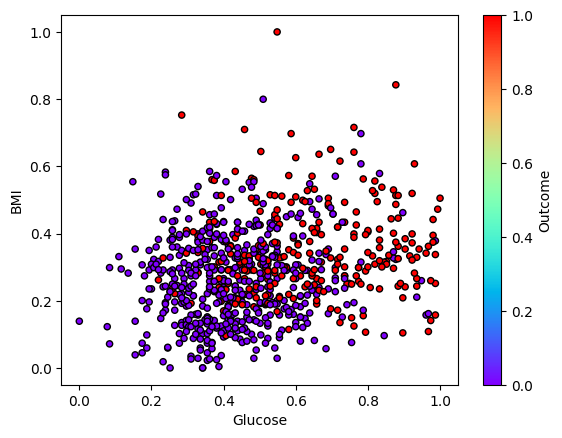

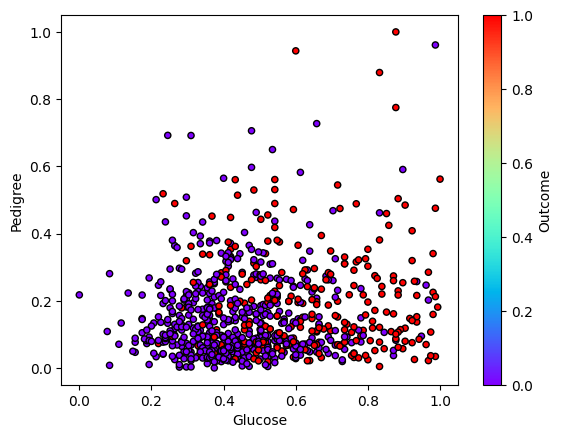

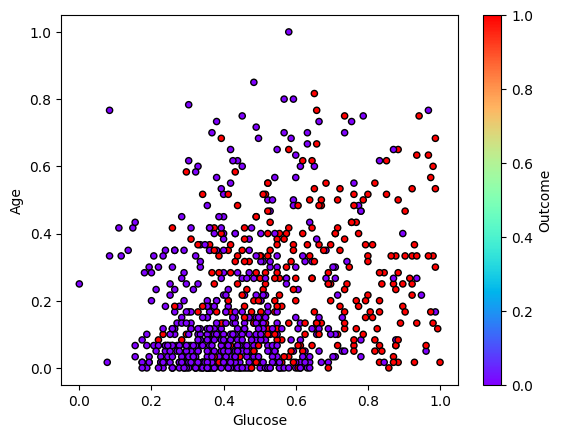

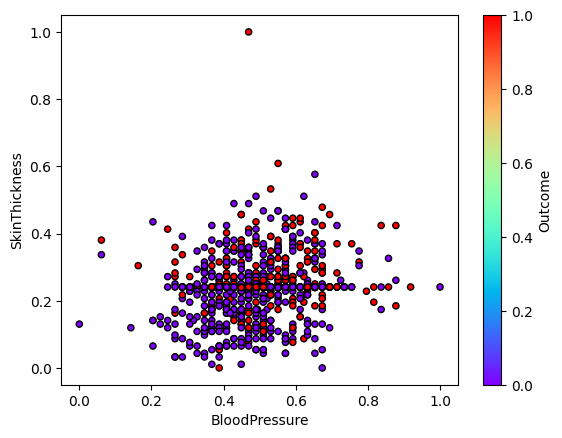

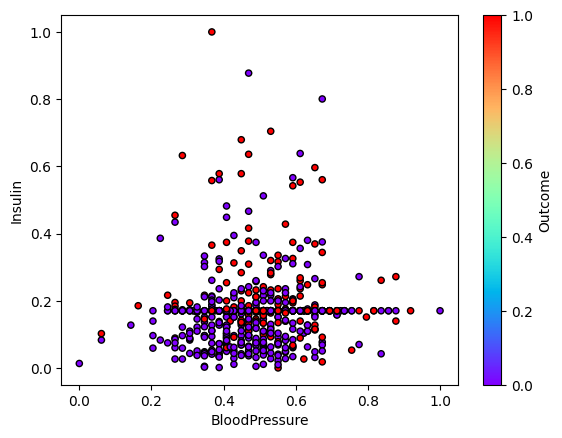

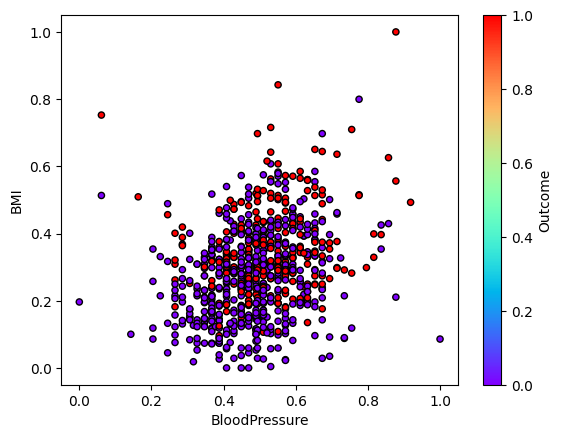

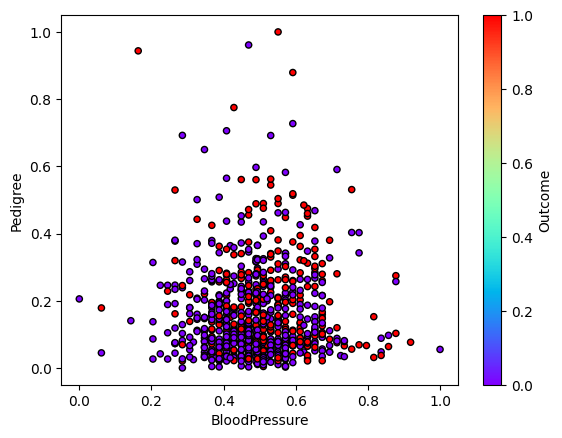

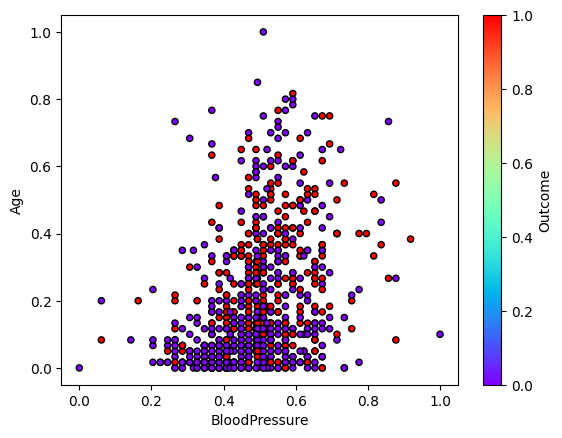

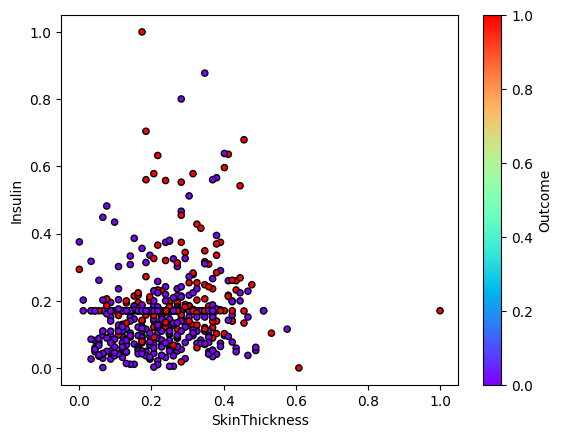

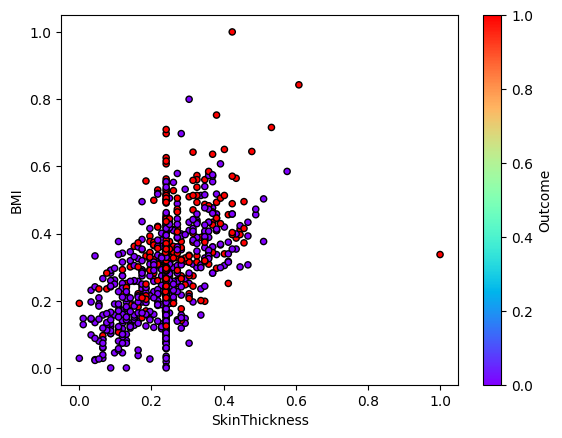

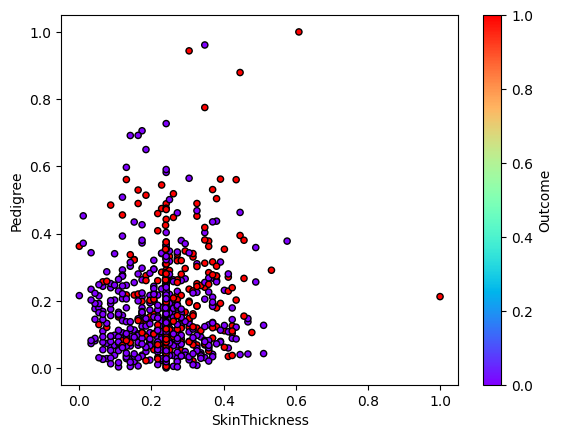

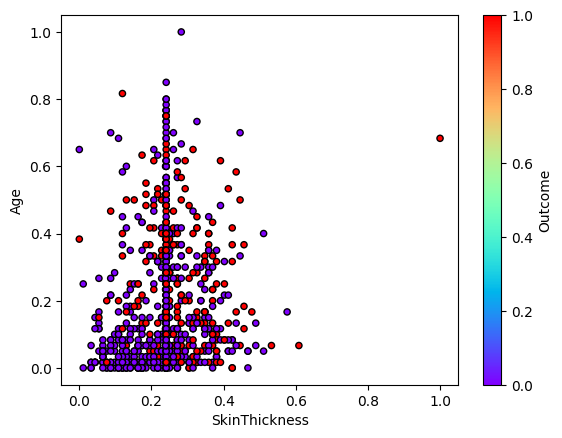

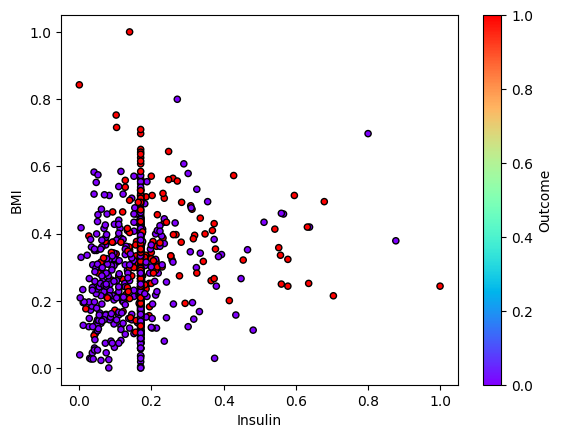

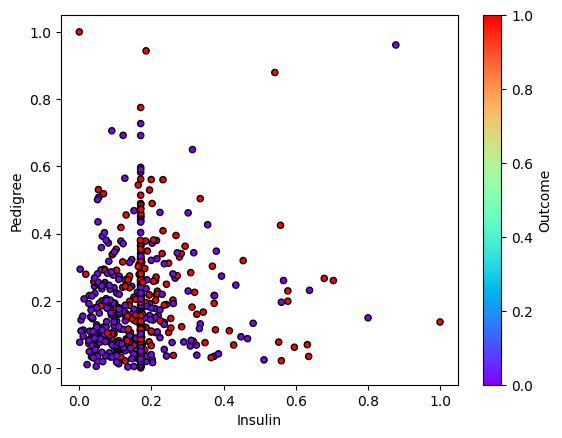

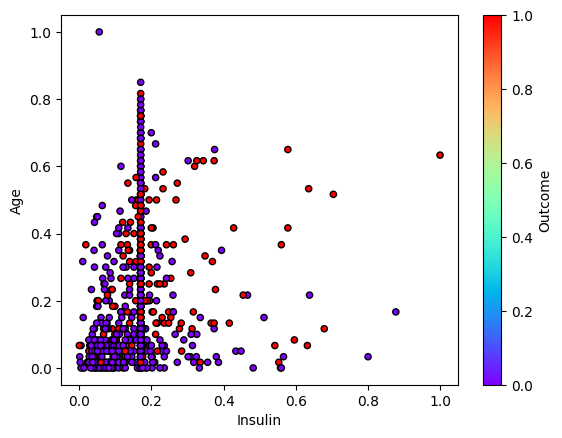

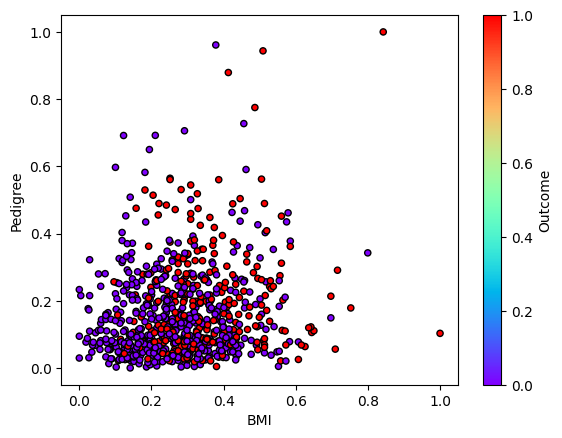

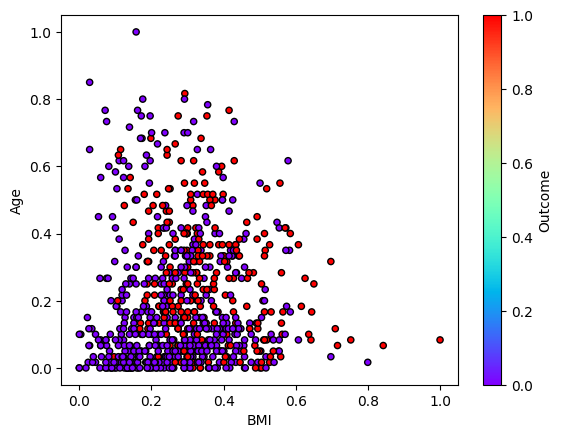

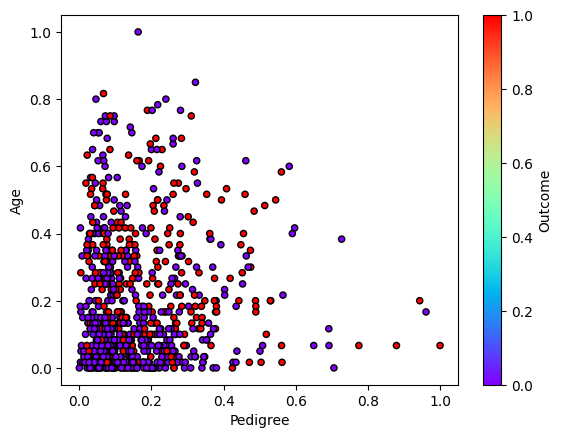

In [220]:
import itertools

df_normal = pd.merge(X, Y, left_index=True, right_index=True)

columns = list(X_train.columns)
combinations = itertools.combinations(columns, 2)

for i_column_name, j_column_name in combinations:
    
    df_normal.plot.scatter(x=i_column_name, y=j_column_name, c='Outcome', colormap='rainbow', edgecolor='black')
     

Построим 3D графики с наиболее подходящими признаками

<module 'matplotlib.pyplot' from 'C:\\Users\\mvideo\\PycharmProjects\\AI_labs\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

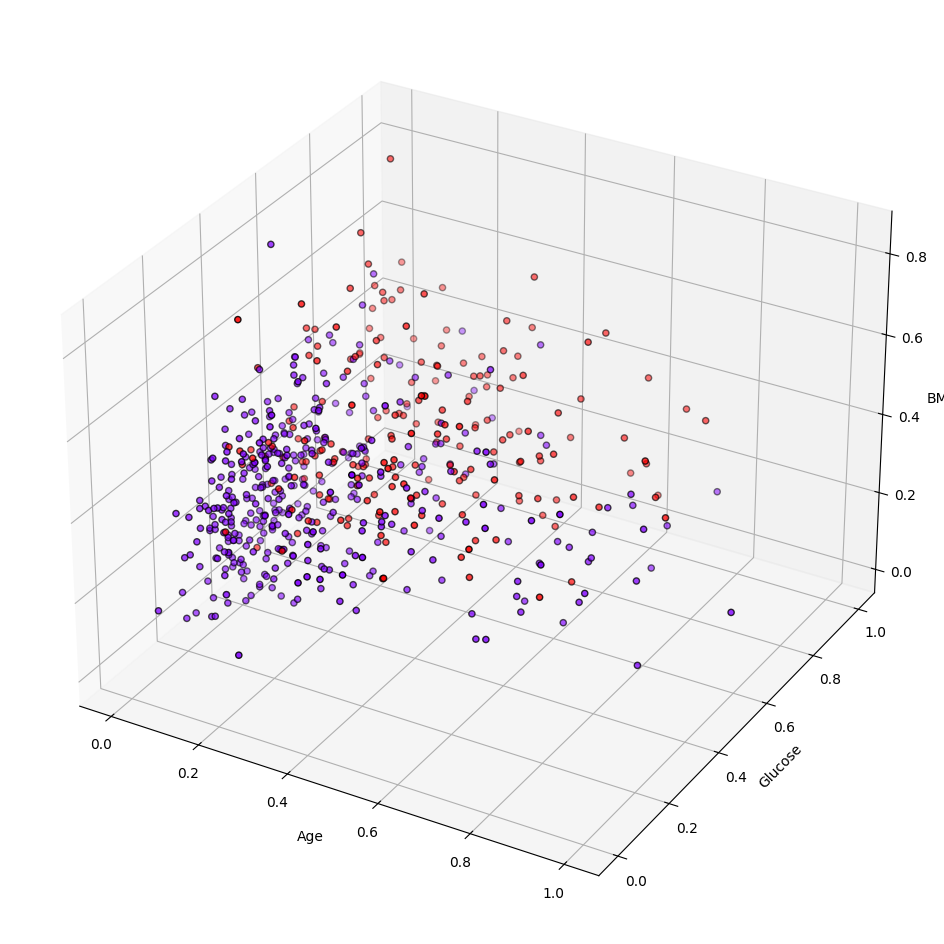

In [221]:
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train['Age'], X_train['Glucose'], X_train['BMI'], c=Y_train, cmap='rainbow', edgecolor='black')

ax.set_xlabel('Age')
ax.set_ylabel('Glucose')
ax.set_zlabel('BMI')

plt

<module 'matplotlib.pyplot' from 'C:\\Users\\mvideo\\PycharmProjects\\AI_labs\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

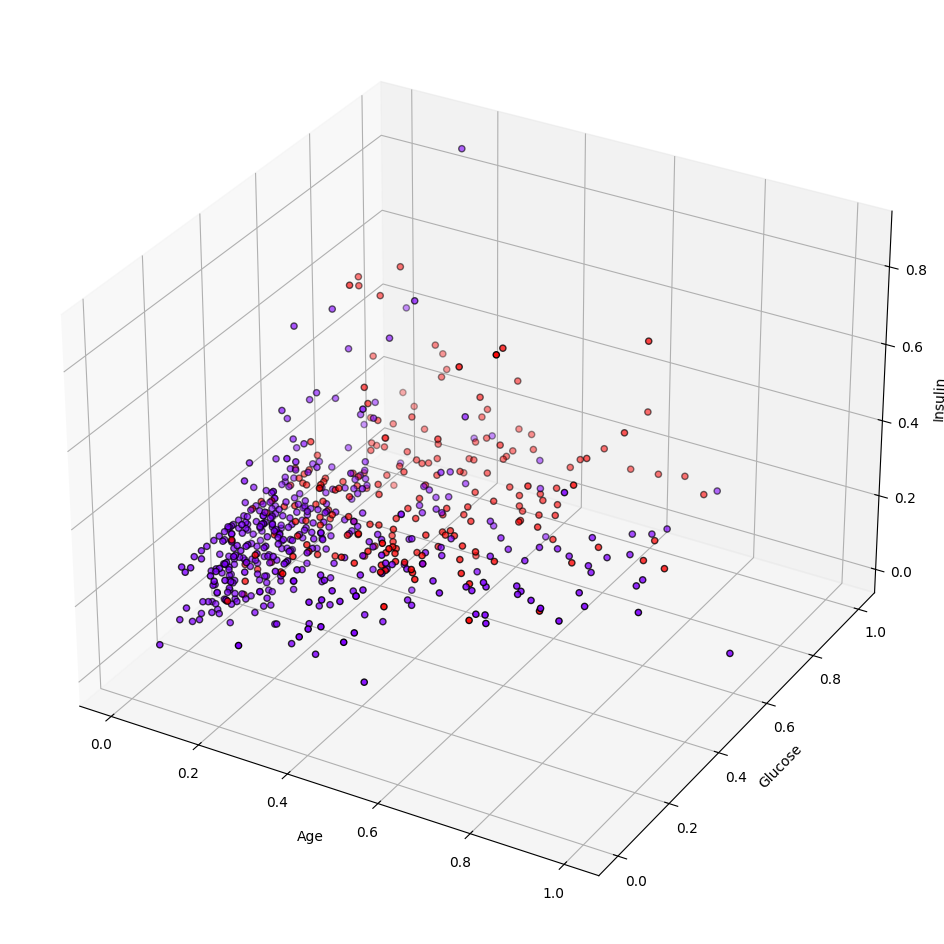

In [222]:
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train['Age'], X_train['Glucose'], X_train['Insulin'], c=Y_train, cmap='rainbow', edgecolor='black')

ax.set_xlabel('Age')
ax.set_ylabel('Glucose')
ax.set_zlabel('Insulin')

plt

Создадим модель

In [243]:
fixed_columns = ['Age', 'Glucose', 'BMI']

columns_to_drop = []
for i in columns:
  if i not in fixed_columns:
    columns_to_drop.append(i)

fixed_X_train = X_train.drop(columns_to_drop, axis=1)
fixed_X_test = X_test.drop(columns_to_drop, axis=1)

fixed_model = [fixed_X_train, fixed_X_test, Y_train, Y_test]

Матрицы ошибок

In [244]:
k_values = [3, 5, 14, 30, 100]
def generate_confusion_matrices(model, model_name):
  for k in k_values:
    predicted = predict_all(model[0], model[2], model[1], k)
    expected = Y_test.values
    confusion_matrix = [[0,0], [0,0]]

    for i in range(len(expected)):
      if predicted[i] == expected[i]:
        confusion_matrix[predicted[i] - 1][predicted[i] - 1] += 1
      else:
        confusion_matrix[expected[i] - 1][predicted[i] - 1] += 1

    df_cm = pd.DataFrame(confusion_matrix, index = [1, 2], columns = [1, 2])
    plt.figure(figsize = (10,9))
    sn.heatmap(df_cm, annot=True)

    accuracy = 0

    for i in range(len(confusion_matrix)):
      accuracy += confusion_matrix[i][i]
    accuracy = accuracy / np.sum(confusion_matrix)

    plt.title(f'Модель {model_name}, k = {k}', fontsize=15)
    plt.xlabel(f'Предсказание \n Точность = {round(accuracy * 100, 3)}%', fontsize=15)
    plt.ylabel('Истина', fontsize=15)

    plt.show()

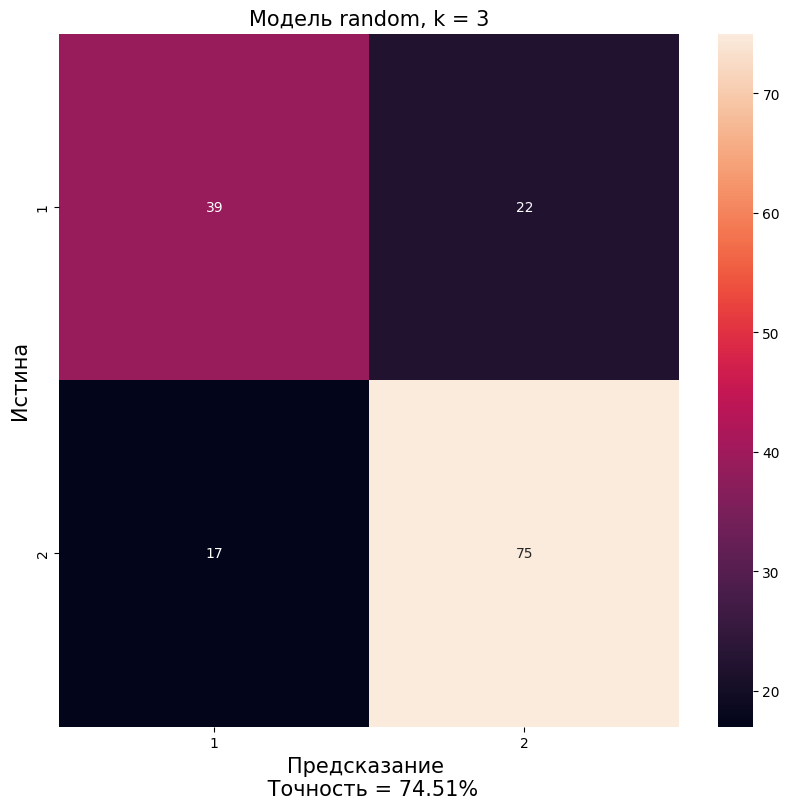

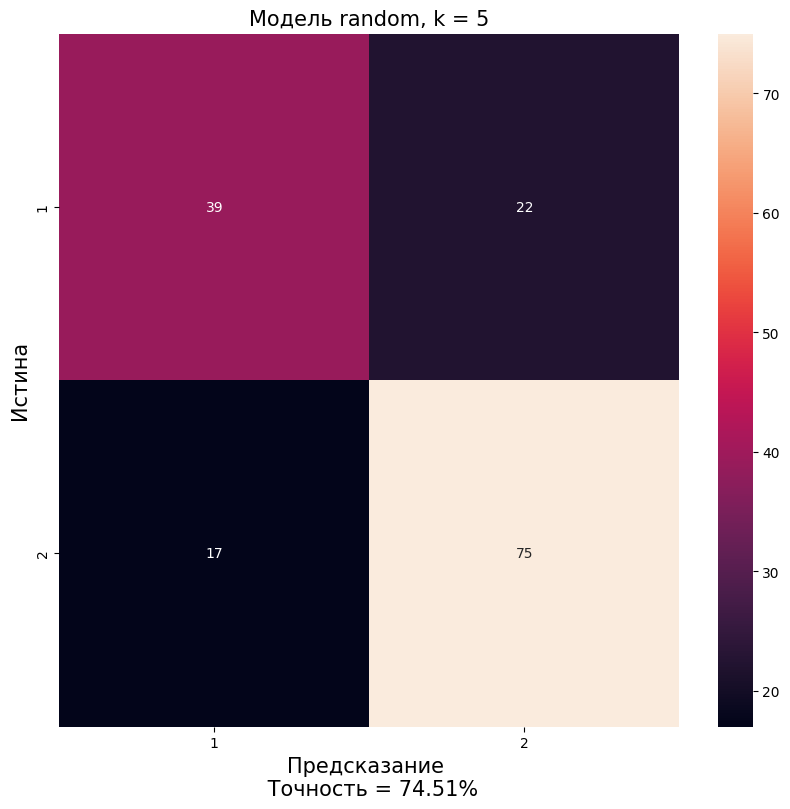

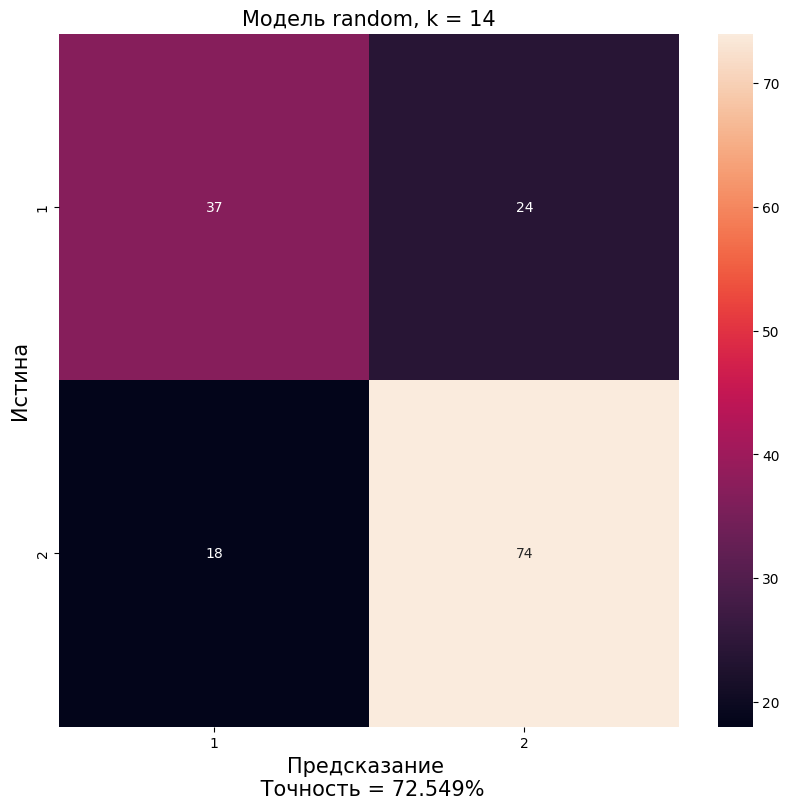

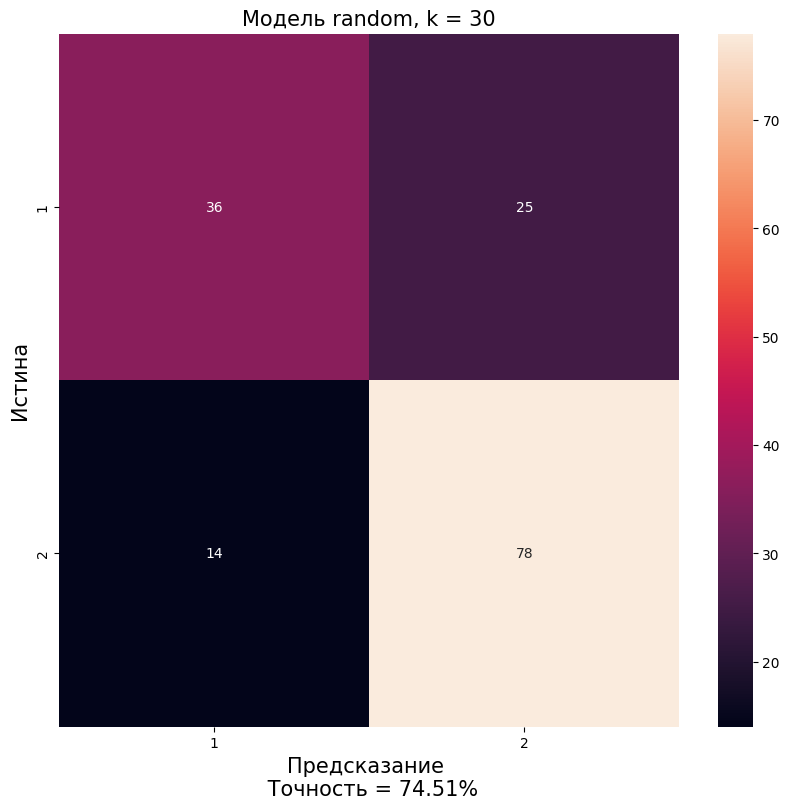

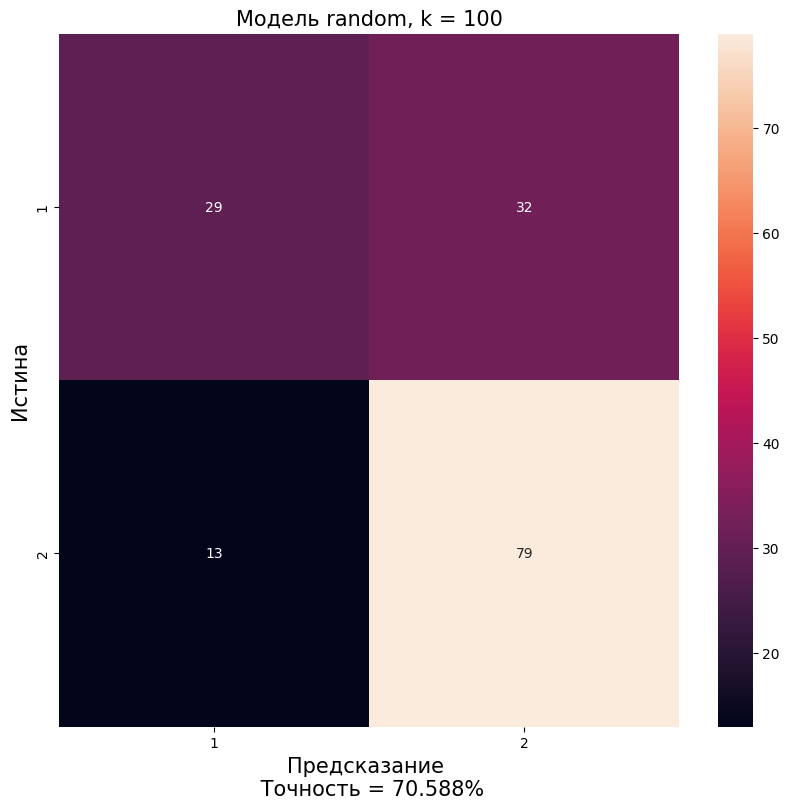

In [245]:
generate_confusion_matrices(random_model, 'random')

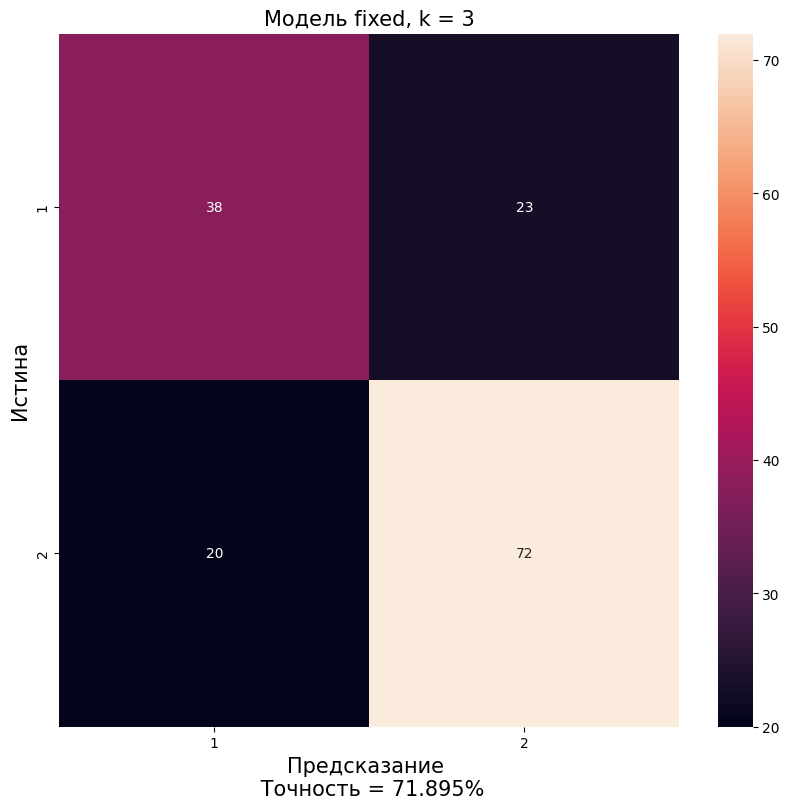

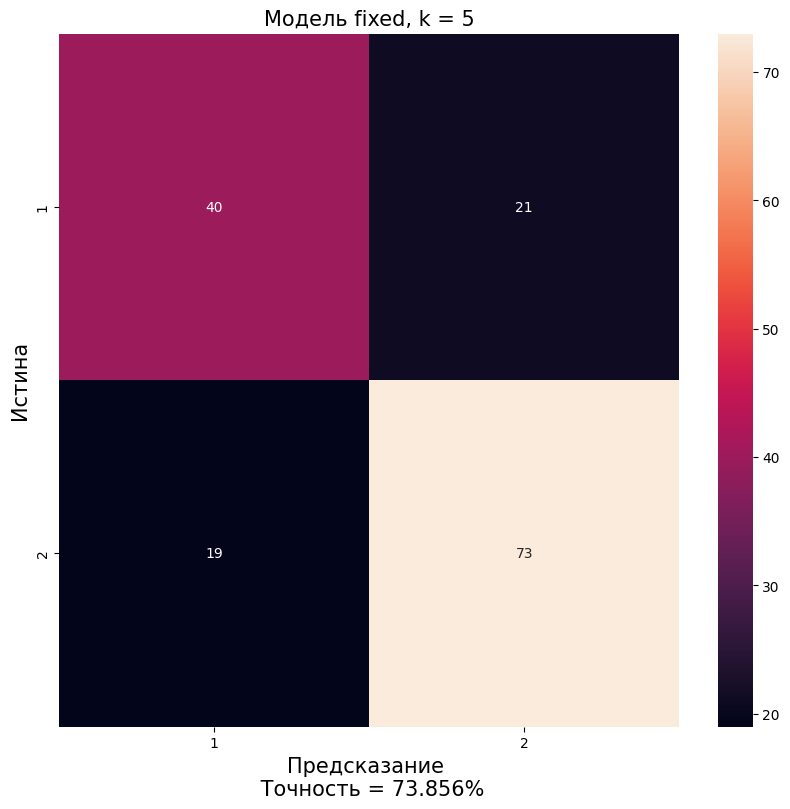

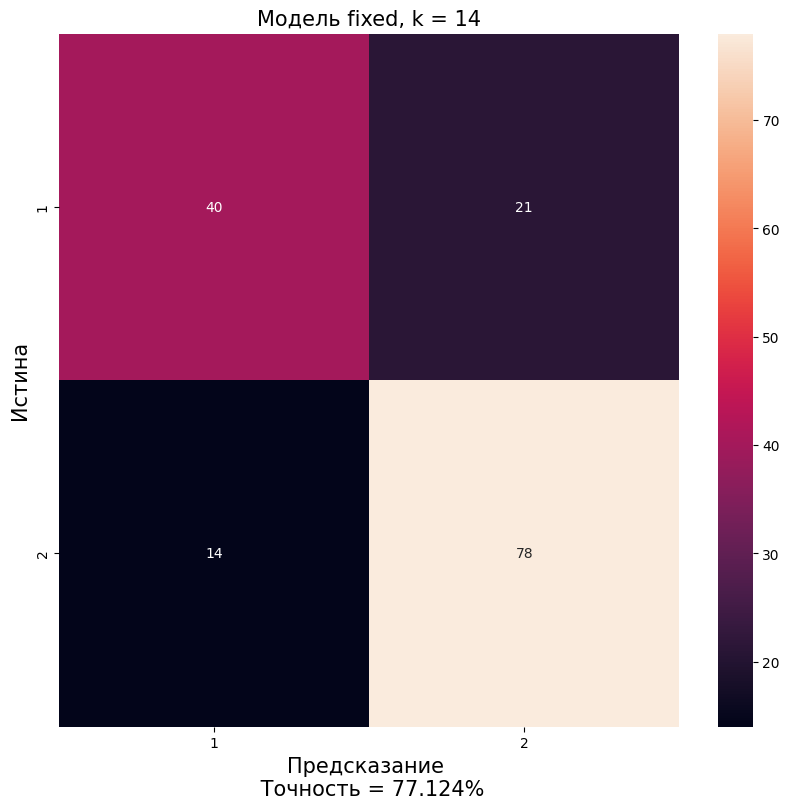

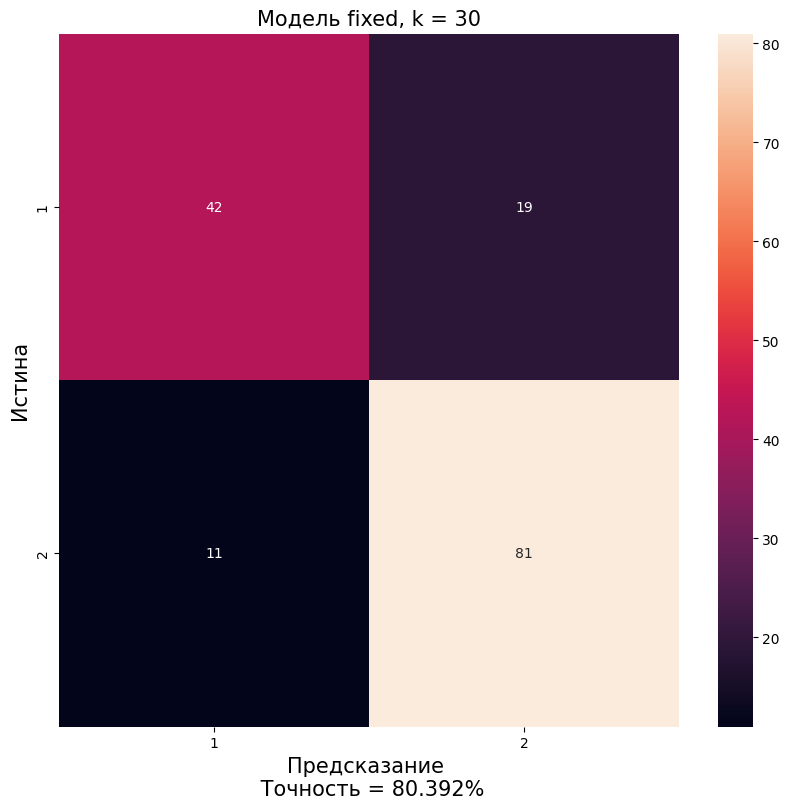

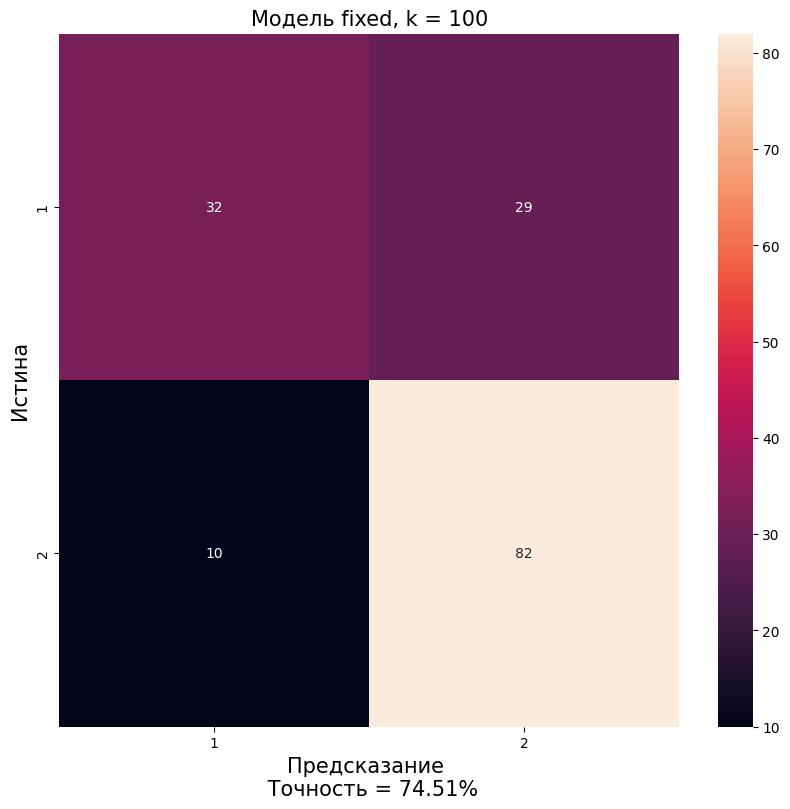

In [246]:
generate_confusion_matrices(fixed_model, 'fixed')